<a href="https://colab.research.google.com/github/hecjhern/Procesamiento-de-Datos/blob/main/Practica3HectorHdz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [12]:
from sklearn import datasets
data = datasets.load_diabetes()

In [16]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [22]:
diabX = pd.DataFrame(data.data, columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])

In [32]:
diabX.head()

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [24]:
diabX.shape


(442, 10)

In [26]:
diabY = pd.DataFrame(data.target, columns = ["diabetes"])

In [27]:
diabY.shape

(442, 1)

In [29]:
diabX = sm.add_constant(diabX)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
ks = sm.OLS(diabY, diabX)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               diabetes   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           3.83e-62
Time:                        02:49:31   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
sex         -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**PARA EL CASO DE ESTOS DATOS LAS VARIABLES BINARIAS YA VIENEN CON ENCODING**

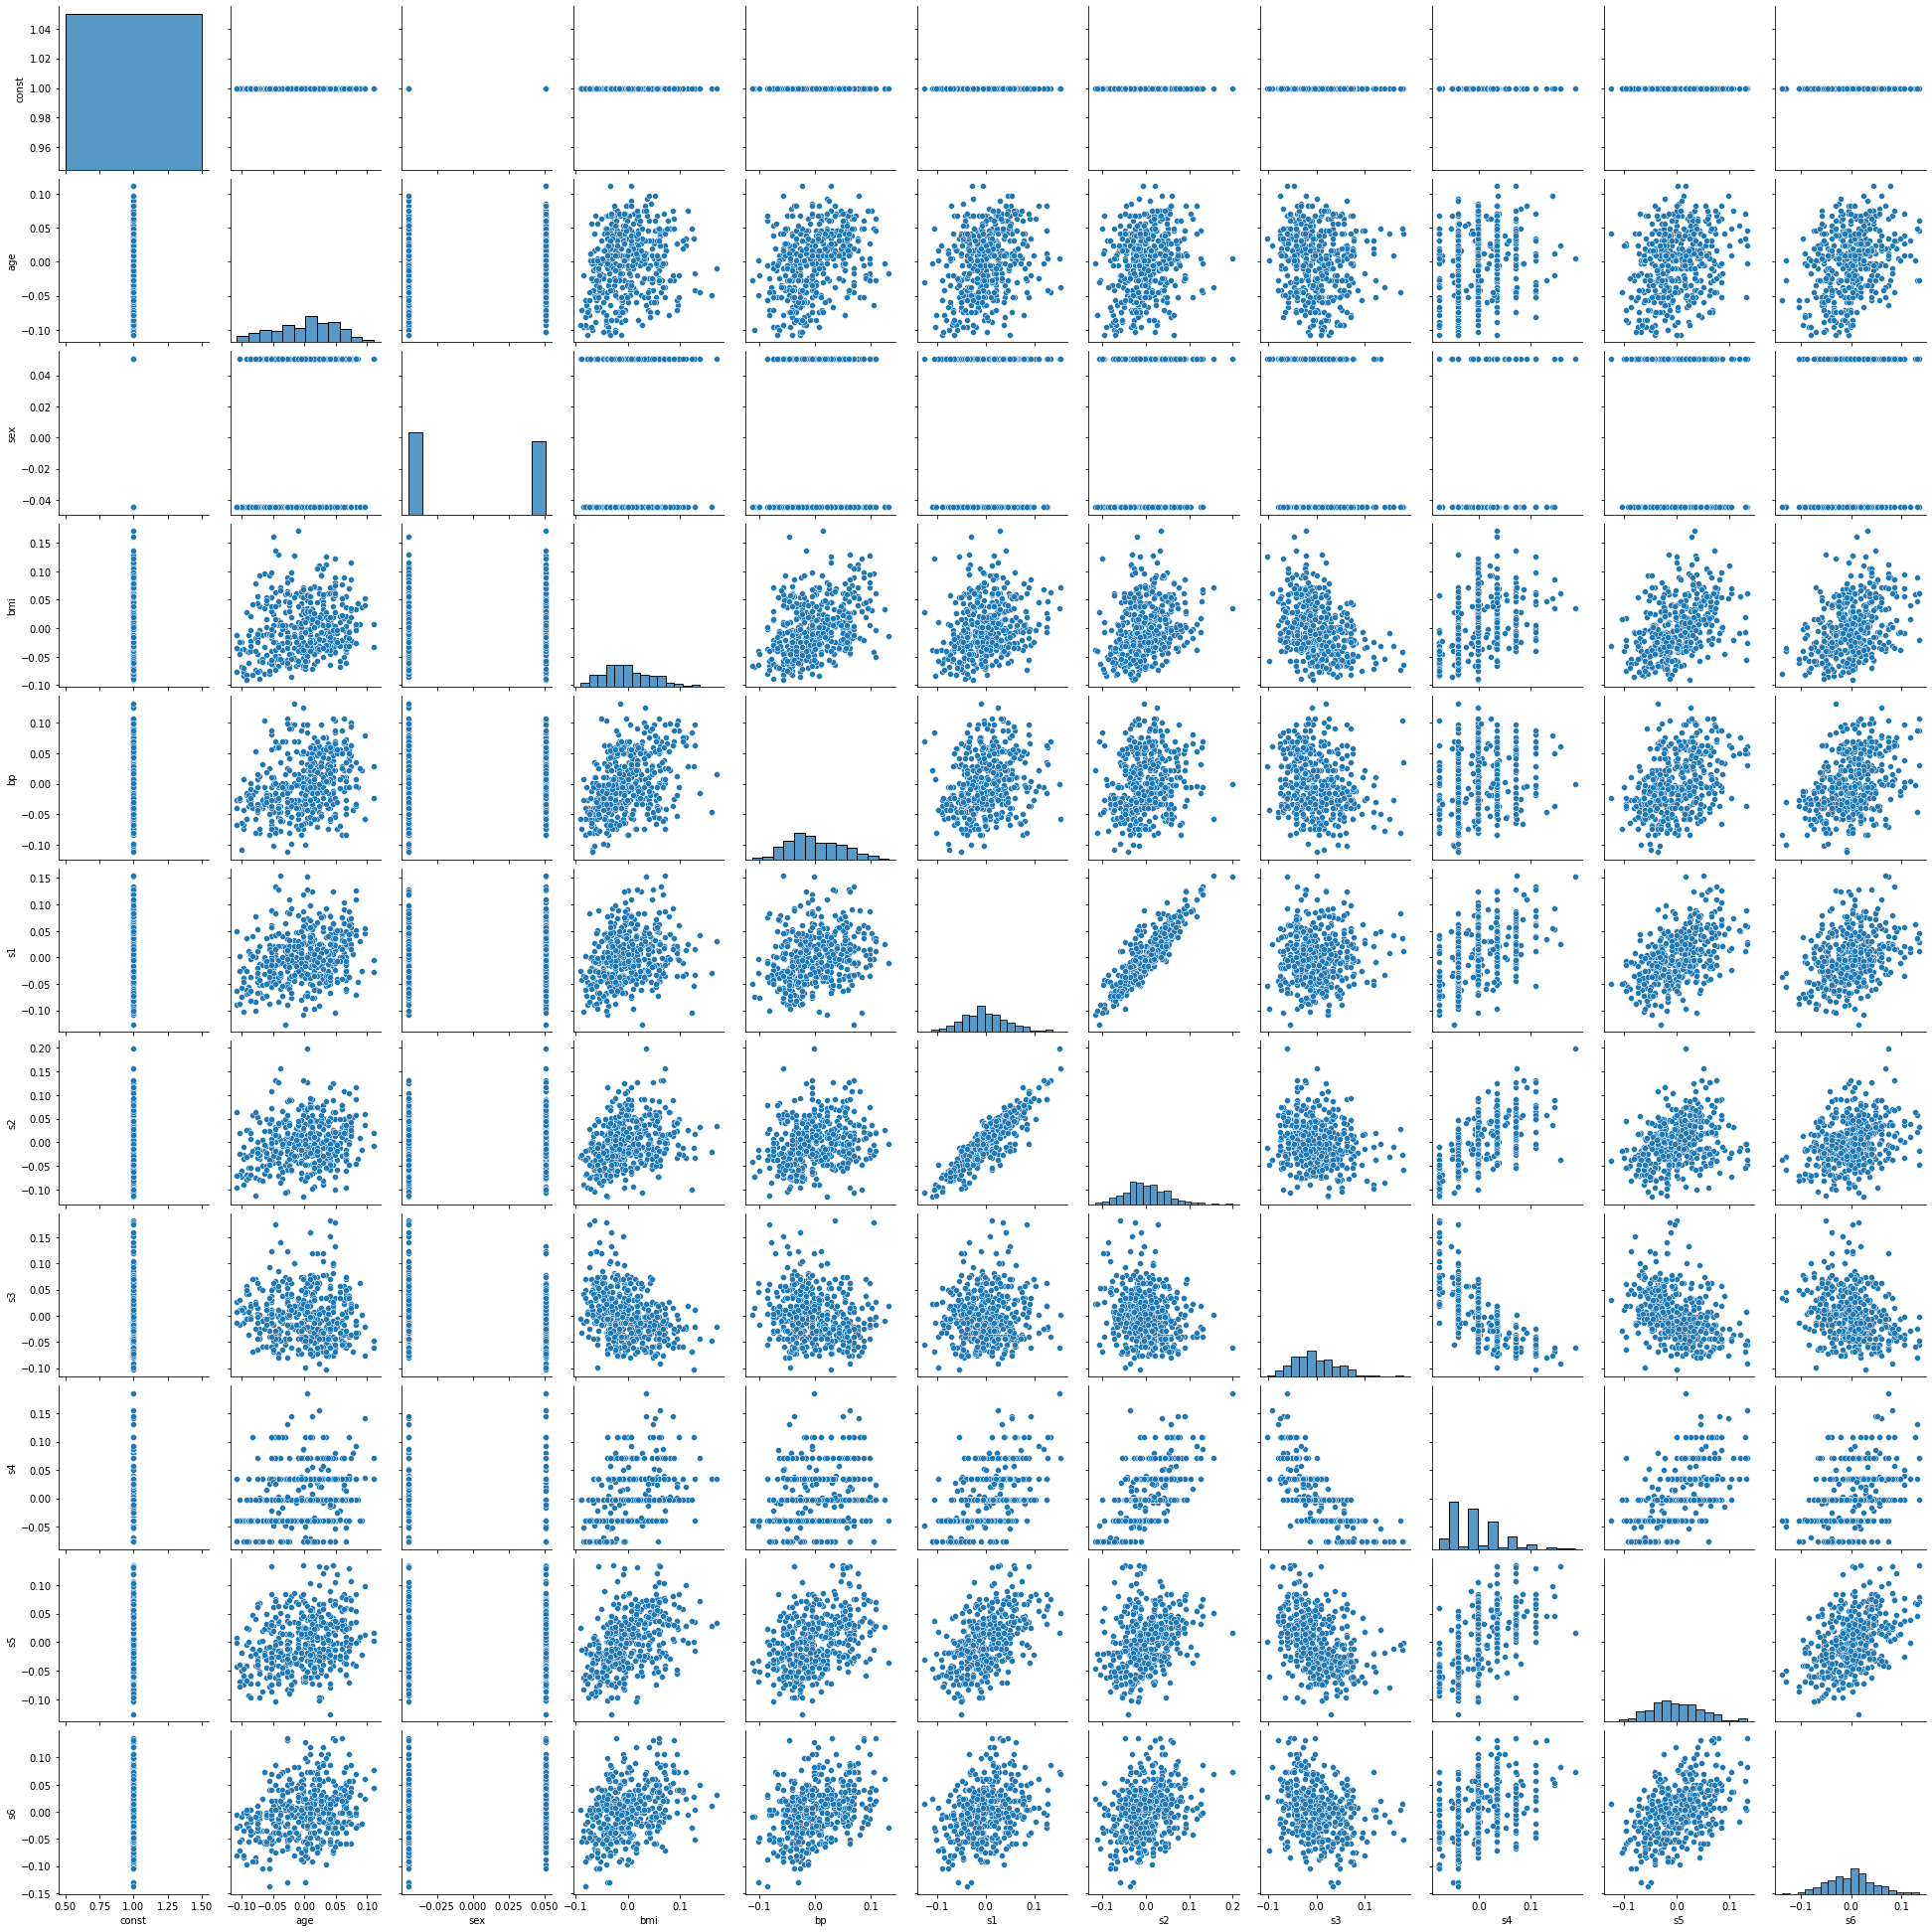

In [34]:
sns.pairplot(diabX)

In [39]:
round(diabX.corr(),2)

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30
sex,NaN,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21
bmi,NaN,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39
bp,NaN,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39
s1,NaN,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33
s2,NaN,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29
s3,NaN,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27
s4,NaN,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42
s5,NaN,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


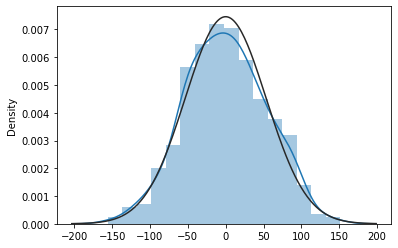

In [43]:
from scipy import stats
sns.distplot(ks_res.resid, fit=stats.norm);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


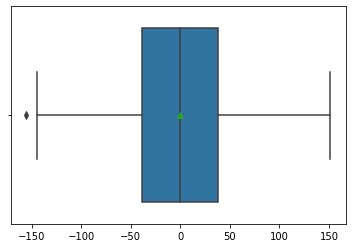

In [44]:
sns.boxplot(ks_res.resid, showmeans=True)

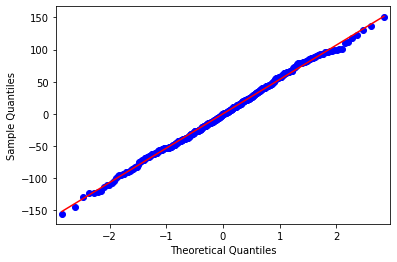

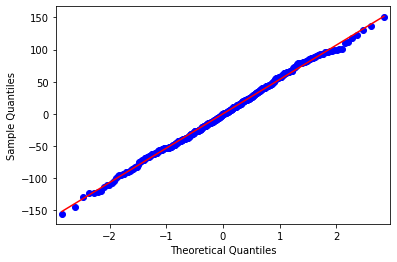

In [45]:
sm.qqplot(ks_res.resid, line='s')

In [51]:
ks_res.fittedvalues

0      206.117070
1       68.072348
2      176.884060
3      166.917966
4      128.459842
          ...    
437    193.018028
438    101.051699
439    121.225055
440    211.858895
441     53.448190
Length: 442, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


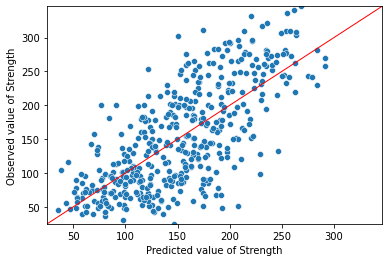

In [53]:
Y_max = data.target.max()
Y_min = data.target.min()

ax = sns.scatterplot(ks_res.fittedvalues, data.target)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [57]:
from scipy import stats
Y_norm = pd.Series(stats.zscore(data.target))
Y_norm.head(3)

0   -0.014719
1   -1.001659
2   -0.144580
dtype: float64

In [58]:
X1_norm = diabX.loc[:, diabX.columns != "const"]
X1_norm = pd.DataFrame(stats.zscore(X1_norm))
X1_norm = sm.add_constant(X1_norm)
X1_norm.columns = diabX.columns
check = pd.concat([round(X1_norm.mean(axis=0), 5), round(X1_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,mean,std dev
const,1.0,0.0
age,-0.0,1.0
sex,-0.0,1.0
bmi,-0.0,1.0
bp,0.0,1.0
s1,0.0,1.0
s2,-0.0,1.0
s3,0.0,1.0
s4,-0.0,1.0
s5,0.0,1.0


In [59]:
modstd = sm.OLS(Y_norm, X1_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           3.83e-62
Time:                        03:14:02   Log-Likelihood:                -466.00
No. Observations:                 442   AIC:                             954.0
Df Residuals:                     431   BIC:                             999.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.67e-16      0.033  -4.99e-15      1.000      -0.066       0.066
age           -0.0062      0.037     -0.168      0.867      -0.079       0.066
sex           -0.1481      0.038     -3.917      0.000      -0.222      -0.074
bmi            0.3211      0.041      7.813      0.000       0.240       0.402
bp             0.2004      0.040      4.958      0.000       0.121       0.280
s1            -0.4893      0.257     -1.901      0.058      -0.995       0.017
s2             0.2945      0.209      1.406      0.160      -0.117       0.706
s3             0.0624      0.131      0.475      0.635      -0.196       0.320
s4             0.1094      0.100      1.097      0.273      -0.087       0.305
s5             0.4641      0.106      4.370      0.000       0.255       0.673
s6             0.0418      0.041      1.025      0.306      -0.038       0.122
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

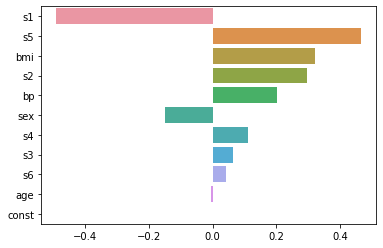

In [60]:
coeff = modstd_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

In [61]:
X2 = diabX
X2.drop("const", axis=1, inplace=True)
X2.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [67]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ca25d624070950583aa7109e5f77f70ef09d4ff5e381fbcb9348f3b72aa8ab89
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


De aquí en delante Colab no me dejo hacer la ultima partecita ya que no encuentra el modulo joblib de sklearn.externals, pero el 95% de la practica está hecha.

In [68]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

ModuleNotFoundError: ignored

In [ ]:
mod = LinearRegression()
mod.fit(X2,Y)

In [ ]:
coef = pd.concat([pd.Series(X2.columns), pd.Series(mod.coef_)], axis=1)
coef.columns=["variable", "coefficient"]
coef